# QU CBE Introduction to Python Workshop - Basic Economic Applications

**Mohammed Ait Lahcen, Department of Finance and Economics, College of Business and Economics, Qatar University**

## Utility maximization

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Let's try to maximize the following lifetime utility:
$$
U = \log{c_1} + \beta \log{c_2}
$$
subject to the constraint:
$$
c_1 + c_2 \leq y
$$

Before trying to find the solution, let's plot the actual utility function:

In [2]:
beta = 0.96
y = 10

def u(c):
    return np.log(c[0]) + beta * np.log(c[1])

We create the grids of $c_1$ and $c_2$ and combine the two to create the coordinates for our 3D graph using `meshgrid`:

In [3]:
c1_grid = np.linspace(1, 10, 100)
c2_grid = np.linspace(1, 10, 100)
c1, c2 = np.meshgrid(c1_grid, c2_grid)

In order to plot in 3D we need to do some additional imports:

In [4]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

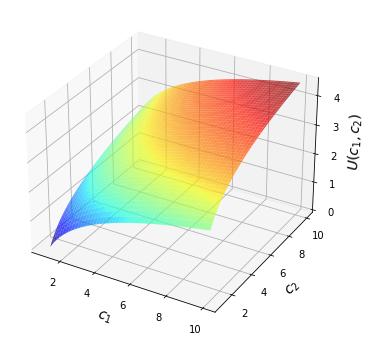

In [5]:
fig = plt.figure(figsize=(9,6))  
ax = fig.add_subplot(1,1,1, projection='3d') 
ax.plot_surface(c1,
                c2,
                u([c1,c2]),
                rstride=2, cstride=2,
                cmap=cm.jet,
                alpha=0.7,
                linewidth=0.25)
ax.set_xlabel(r'$c_1$', fontsize=14)
ax.set_ylabel(r'$c_2$', fontsize=14)
ax.set_zlabel(r'$U(c_1,c_2)$', fontsize=14)
plt.show()

Next, let's plot the budget constraint along with some indifference curves. For the latter we use a contour map:

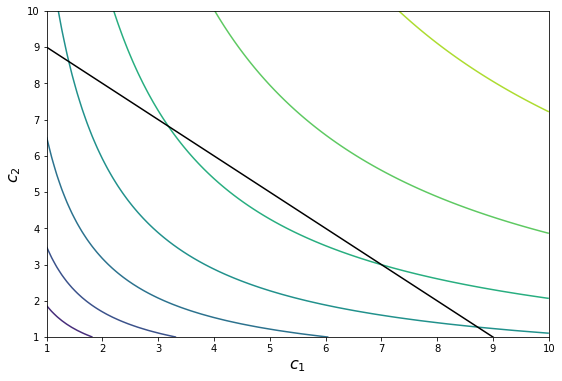

In [6]:
plt.figure(figsize=(9,6))
plt.contour(c1,c2,u([c1,c2]))
plt.plot(c1_grid,10-c1_grid,'k')
plt.xlim((1, 10))
plt.ylim((1, 10))
plt.xlabel(r'$c_1$',fontsize=16)
plt.ylabel(r'$c_2$',fontsize=16)
plt.show()

In order to solve the maximization problem, we use the contrained optimization solver `SLSQP` available through the Scipy function `minimize`:

In [7]:
from scipy.optimize import minimize

cons = ({'type': 'ineq', 'fun': lambda c:  -c[0] -c[1] + y})

sol = minimize(lambda x: -u(x), ([5, 5]), method='SLSQP', constraints=cons)

sol.x

array([5.10046633, 4.89953367])

Now we plot the optimal consumption bundle and the utility level it provides on top of our contour map:

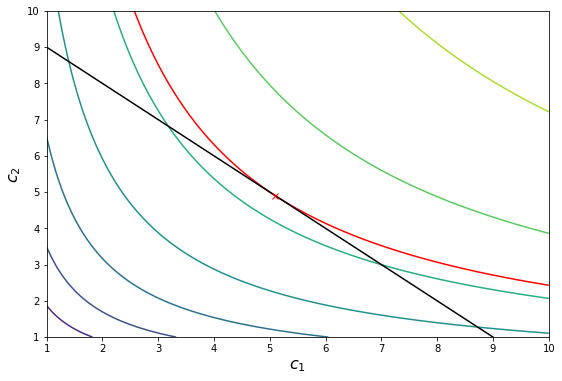

In [8]:
plt.figure(figsize=(9,6))
plt.contour(c1,c2,u([c1,c2]))
plt.plot(c1_grid,10-c1_grid,'k')
plt.contour(c1, c2, u([c1,c2]), levels=[-sol.fun], colors='r')
plt.plot(sol.x[0],sol.x[1],'rx')
plt.xlim((1, 10))
plt.ylim((1, 10))
plt.xlabel(r'$c_1$',fontsize=16)
plt.ylabel(r'$c_2$',fontsize=16)
plt.show()